# Consumo de electricidad

Andrés Camilo Gaitán Díaz

Base - Individual household electric power consumption Data Set


### Attribute Information:

1. date: Date in format dd/mm/yyyy
2. time: time in format hh:mm:ss
3. global_active_power: household global minute-averaged active power (in kilowatt)
4. global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5. voltage: minute-averaged voltage (in volt)
6. global_intensity: household global minute-averaged current intensity (in ampere)
7. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

### Data Set Information:

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).
Notes:
1. (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
2. The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.





# Data

In [152]:
## Paquetes a utilizar

import pandas as pd  #Para uso de Dataframes
import numpy as np  ## Para 
import matplotlib.pyplot as plt  ## Para gráficos


In [153]:
Data = pd.read_table('./household_power_consumption.txt', sep = ';')
Data.head()

c:\users\andre\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [154]:
## Dimensiones de la información
Data.shape

(2075259, 9)

In [155]:
## Copia sobre la original
df = Data.copy()
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

# Data Wrangling

In [156]:
## Verirficcar tipos de datos
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [157]:
## Verificar NAs

100*df.isna().sum()/Data.shape[0]

Date                     0.000000
Time                     0.000000
Global_active_power      0.000000
Global_reactive_power    0.000000
Voltage                  0.000000
Global_intensity         0.000000
Sub_metering_1           0.000000
Sub_metering_2           0.000000
Sub_metering_3           1.251844
dtype: float64

In [158]:
## Encontrar valores diferentes
df[['Global_active_power','Global_reactive_power','Global_intensity', 'Voltage']].value_counts()

Global_active_power  Global_reactive_power  Global_intensity  Voltage
?                    ?                      ?                 ?          25979
0.360                0.078                  1.600             241.180      400
0.080                0.000                  0.200             240.250       45
                                                              240.780       40
                                                              240.060       37
                                                                         ...  
1.414                0.094                  5.800             239.940        1
                                                              239.980        1
                                                              240.000        1
                                                              240.080        1
0.21                 0.07400000000000001    1.0               233.42         1
Length: 1845087, dtype: int64

In [159]:
## Borar todos lo valores que tengasn el signo encontrado
df = df.drop(df[df['Global_active_power'] == '?'].index)
df = df.dropna()

In [160]:
## Información total
100 - 100*df.shape[0]/Data.shape[0]

1.2518437457685962

In [161]:
## Cambiar  tpos de datos
df['Date'] = pd.to_datetime(df['Date'])
df['Global_active_power'] = df['Global_active_power'].astype(float)
df['Global_reactive_power'] = df['Global_reactive_power'].astype(float)
df['Voltage'] = df['Voltage'].astype(float)
df['Global_intensity'] = df['Global_intensity'].astype(float)
df['Sub_metering_1'] = df['Sub_metering_1'].astype(float)
df['Sub_metering_2'] = df['Sub_metering_2'].astype(float)
df['Sub_metering_3'] = df['Sub_metering_3'].astype(float)

In [162]:
##  Creación de consumo total

df['Total'] = df['Global_active_power']*1000/60 - df['Sub_metering_1'] - df['Sub_metering_2'] - df['Sub_metering_3']
df['Total_sum'] = df['Global_active_power']*1000/60

In [163]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total,Total_sum
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667,70.266667
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333,89.333333
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667,89.566667
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000,89.800000
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000,61.100000


In [168]:
## Crear un DF que contenga el total de cada variable de acuerdo al mes de interés

prom= pd.DataFrame(df['Total'].groupby([(df['Date'].dt.year),(df['Date'].dt.month)]).sum())
prom['Total_sum'] = pd.DataFrame(df['Total_sum'].groupby([(df['Date'].dt.year),(df['Date'].dt.month)]).sum())
prom['sub_1']= pd.DataFrame(df['Sub_metering_1'].groupby([(df['Date'].dt.year),(df['Date'].dt.month)]).sum())
prom['sub_2']= pd.DataFrame(df['Sub_metering_2'].groupby([(df['Date'].dt.year),(df['Date'].dt.month)]).sum())
prom['sub_3']= pd.DataFrame(df['Sub_metering_3'].groupby([(df['Date'].dt.year),(df['Date'].dt.month)]).sum())
prom['Voltage']= pd.DataFrame(df['Voltage'].groupby([(df['Date'].dt.year),(df['Date'].dt.month)]).mean())
prom['Global_intensity']= pd.DataFrame(df['Global_intensity'].groupby([(df['Date'].dt.year),(df['Date'].dt.month)]).mean())
prom['Global_reactive_power']= pd.DataFrame(df['Global_intensity'].groupby([(df['Date'].dt.year),(df['Date'].dt.month)]).mean())

In [169]:
# Cambiar nombre de Index para facilitar
prom.index.rename(['Year','Month'], inplace = True)
prom.reset_index(inplace = True)
prom.head()

,Year,Month,Total,Total_sum,sub_1,sub_2,sub_3,Voltage,Global_intensity,Global_reactive_power
0,2006,12,457765.033333,6.968880e+05,27460.0,48712.0,162951.0,241.441125,8.029956,8.029956
1,2007,1,601322.900000,1.063262e+06,72455.0,66382.0,323102.0,240.149795,6.063914,6.063914
2,2007,2,441926.466667,7.760505e+05,35733.0,65508.0,232883.0,239.871289,4.895550,4.895550
3,2007,3,494800.733333,9.212927e+05,58307.0,87919.0,280266.0,239.948472,5.252716,5.252716
4,2007,4,350250.466667,6.440235e+05,45958.0,53811.0,194004.0,238.653884,4.211531,4.211531


In [170]:
## Crear la fecha
prom['Date'] = pd.to_datetime((prom['Year'].map(str) + '-' + prom['Month'].map(str)))
prom['Date'] = prom['Date'].dt.date.apply(lambda x: x.strftime('%Y-%m'))
prom.head()

,Year,Month,Total,Total_sum,sub_1,sub_2,sub_3,Voltage,Global_intensity,Global_reactive_power,Date
0,2006,12,457765.033333,6.968880e+05,27460.0,48712.0,162951.0,241.441125,8.029956,8.029956,2006-12
1,2007,1,601322.900000,1.063262e+06,72455.0,66382.0,323102.0,240.149795,6.063914,6.063914,2007-01
2,2007,2,441926.466667,7.760505e+05,35733.0,65508.0,232883.0,239.871289,4.895550,4.895550,2007-02
3,2007,3,494800.733333,9.212927e+05,58307.0,87919.0,280266.0,239.948472,5.252716,5.252716,2007-03
4,2007,4,350250.466667,6.440235e+05,45958.0,53811.0,194004.0,238.653884,4.211531,4.211531,2007-04


In [173]:
prom.columns

Index(['Year', 'Month', 'Total', 'Total_sum', 'sub_1', 'sub_2', 'sub_3',
       'Voltage', 'Global_intensity', 'Global_reactive_power', 'Date'],
      dtype='object')

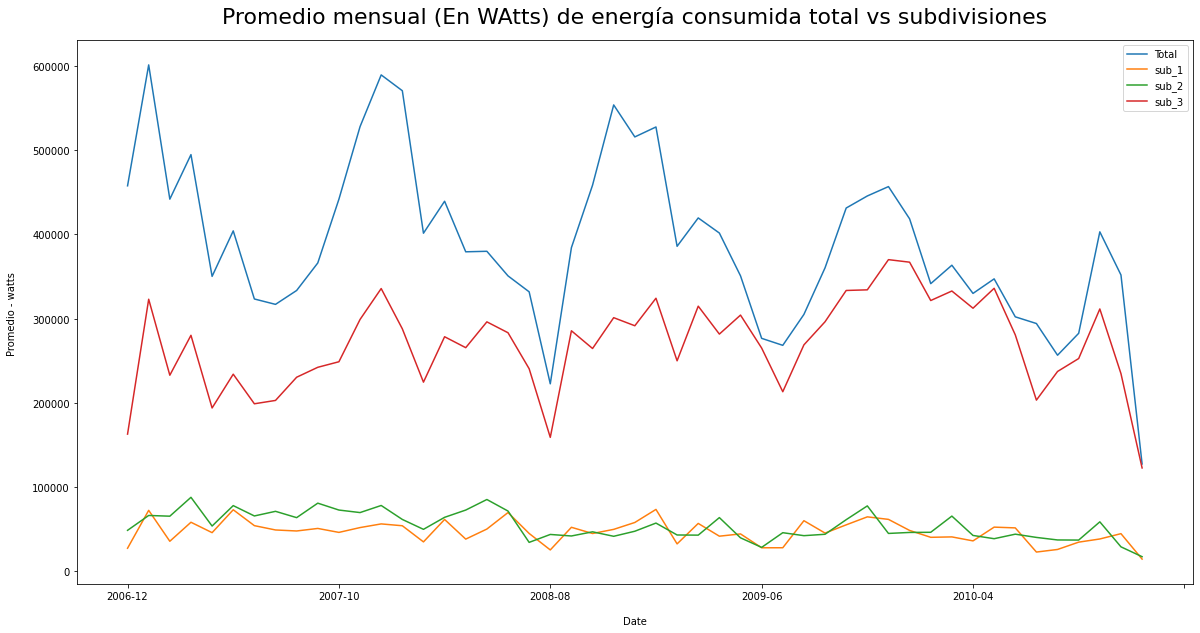

In [171]:
# Gráfco general

prom.set_index('Date')[['Total','sub_1','sub_2','sub_3']].plot(figsize = (20,10))
plt.xlabel("Date", labelpad=15)
plt.ylabel("Promedio - watts ", labelpad=15)
plt.title("Promedio mensual (En WAtts) de energía consumida total vs subdivisiones", y=1.02, fontsize=22);

## Consumo

En general:

1. El consumo activo de energía que no relaciona ninguna de als 3 subdivisiones es mayor a las mismas
2. La subdivisión 3 (Calentador de agua y aire condicionado) es el consumo más alto después del consumo activo, en algunos casos llegando a estar muy cerca del total, tiende a ser alejado al consumo general a finales de cada año o inicios del mismo.
3. Las subdivisiones 2 y 3 tienen a ser parecidas y de consumo muy bajo


## Calidad


En términos de calidad, existían 2 tipos de datos *diferentes* a los esperados en la información:

1. Nas contemplan el 1.25% de la información
2. Signos (?), que estaban de igual manera unidos a los NA's

Para este caso, eliminar tales datos no generan impacto en gran medida sobre la base, como resultado se obtiene un 98% de información lista para su explotación. Por otro lado, los datos no venían en su formato esperado, por lo que fue encesario cambiarlos de nuevo.


## Manejo de información

PAra mayor facilidad y entendimiento, se calculo el total mensual de dato que se considera importante analizar en primera medida, teniendo en cuenta las consideraciones de la base, se agrupo mensualmente como se menciona





# Predicción

Para este proceso se realizará a manera de predicción una serie de tiempo, asumiendo lo siguiente:

1. Se manejará el tiempo en meses para su predicción, esto teniendo en cuenta que serían 47 datos.

In [175]:
## Paquetes

from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler

In [177]:
## Escalar información

train = prom[['sub_1', 'sub_2', 'sub_3',
       'Voltage', 'Global_intensity', 'Global_reactive_power']]

escal = MinMaxScaler() ## Escalar
escal.fit(train)
train = escal.transform(train)